In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-11 21:24:16.296002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/x1/3fzzpt8s0wb1z5zdd_z53mxr0000gn/T/ipykernel_97535/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Grab MNIST dataset
trainingSet = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testingSet = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))
train = torch.utils.data.DataLoader(trainingSet, batch_size=25, shuffle=True)
test = torch.utils.data.DataLoader(testingSet, batch_size=25, shuffle=True)

In [3]:
# Calculate the number of parameters in a neural network
def calculate_parameters(inputmodel):
    val = sum(params.numel() for params in inputmodel.parameters() if params.requires_grad)
    return val

In [4]:
class model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

In [5]:
# Set up necessary auxilaries for neural net training
model1 = model1()
model2 = model2()
model3 = model3()
costFunc = nn.CrossEntropyLoss()
model1Opt = optim.Adam(model1.parameters(), lr=0.001)
model2Opt = optim.Adam(model2.parameters(), lr=0.01)
model3Opt = optim.Adam(model3.parameters(), lr=0.1)

In [6]:
# Train all 3 models using different batch sizes
EPOCHS = 10
for index in range(EPOCHS):
    
    # model 1
    for batch in train:
        inputImages, groundTruth = batch
        model1.zero_grad()
        output = model1(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model1Opt.step()

    # model 2
    for batch in train:
        inputImages, groundTruth = batch
        model2.zero_grad()
        output = model2(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model2Opt.step()


In [7]:
# Calculating loss for each value of alpha....
from torch.nn.utils import (
  parameters_to_vector as Params2Vec,
  vector_to_parameters as Vec2Params
)
mod1 = Params2Vec(model1.parameters())
mod2 = Params2Vec(model2.parameters())

#alpha = [-1,-0.5,0,0.5,1.0,1.5,2.0]
alpha = np.arange(-1.0, 2.0 , 0.15)
cost3_train = []
cost3_alpha_train = []
cost3_test = []
accuracy3_alpha_train = []

for a in alpha:
    mod3 = (1 - a)*mod1 + a * mod2
    Vec2Params(mod3,model3.parameters())
    total = 0
    correct = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            #model3.zero_grad()
            output = model3(inputImages.view(-1,784))
            cost = costFunc(output, groundTruth)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
        cost3_alpha_train.append(costTotal / costCounter)
        accuracy3_alpha_train.append(round(correct/total, 3))


In [8]:
accuracy3_alpha_test = []
cost3_alpha_test = []
for a in alpha :
    mod3 = (1 - a)*mod1 + a * mod2
    Vec2Params(mod3,model3.parameters())
    total = 0
    correct = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = model3(inputImages.view(-1,784))
            cost = costFunc(output, groundTruth)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
        cost3_alpha_test.append(costTotal / costCounter)
        accuracy3_alpha_test.append(round(correct/total, 3))

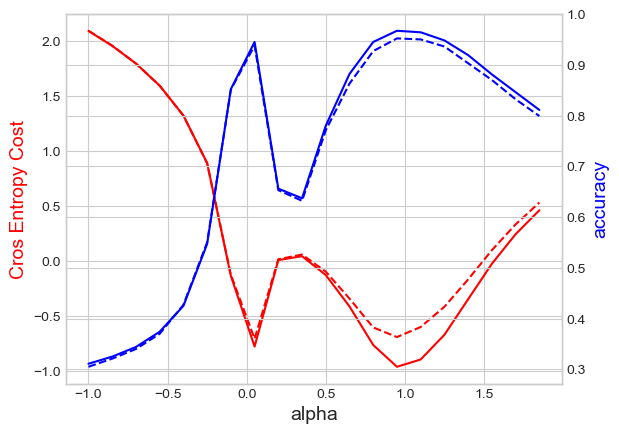

In [9]:
import math
from math import log
cost3_alpha_train = [math.log10(i) for i in cost3_alpha_train]
cost3_alpha_test = [math.log10(i) for i in cost3_alpha_test]

fig,ax = plt.subplots()
ax.plot(alpha,
        cost3_alpha_train,
        color="red")
ax.plot(alpha, cost3_alpha_test, color = "r", linestyle='dashed')
# set x-axis label
ax.set_xlabel("alpha", fontsize = 14)
# set y-axis label
ax.set_ylabel("Cros Entropy Cost",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(alpha, accuracy3_alpha_train ,color="blue")
ax2.plot(alpha, accuracy3_alpha_test, color = "blue", linestyle='dashed')
ax2.set_ylabel("accuracy",color="blue",fontsize=14)
plt.show()